Work with the deepstack face API. 

In [1]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IP_ADDRESS = 'localhost'
PORT = '5000'
API_KEY = ""
TIMEOUT = 30 # Default is 10

## Face API

In [3]:
dsface = ds.DeepstackFace(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

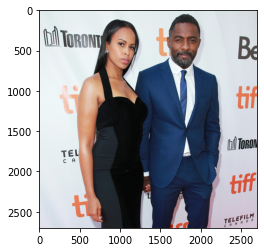

In [4]:
image_path = 'tests/images/couple.jpg'

plt.imshow(Image.open(image_path));

## Face detection
Detect faces, but do not recognise them, quite fast.

In [5]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        dsface.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 7.9 ms, sys: 10.4 ms, total: 18.3 ms
Wall time: 5.08 s


Access the predictions

In [6]:
dsface.predictions

[{'confidence': 0.99997544,
  'y_min': 154,
  'x_min': 1615,
  'y_max': 682,
  'x_max': 1983},
 {'confidence': 0.9999571,
  'y_min': 237,
  'x_min': 869,
  'y_max': 732,
  'x_max': 1214}]

In [7]:
len(dsface.predictions)

2

## Register a face
Post a name and a close up photo of a face

In [8]:
%%time
try:
    with open('tests/images/idris.jpg', "rb") as image_bytes:
        dsface.register_face("idris", image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 6.26 ms, sys: 5.42 ms, total: 11.7 ms
Wall time: 6.24 s


## Face recognition
Recoginition will match any faces that have been taught. This is slower than face detection

In [9]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        dsface.recognise(image_bytes)
        print(dsface.predictions)
except ds.DeepstackException as exc:
    print(exc)

[{'confidence': 0.7536658, 'userid': 'Idris Elba', 'y_min': 154, 'x_min': 1615, 'y_max': 682, 'x_max': 1983}, {'confidence': 0, 'userid': 'unknown', 'y_min': 237, 'x_min': 869, 'y_max': 732, 'x_max': 1214}]
CPU times: user 7.26 ms, sys: 15.9 ms, total: 23.1 ms
Wall time: 6.79 s


## Helper functions
The package provides helper functions for extracting info out of deepstack predictions.

Get recognised faces and their probability (%)

In [10]:
ds.get_recognised_faces(dsface.predictions)

{'Idris Elba': 75.4}